In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.cluster import KMeans
import seaborn as sns

In [83]:
testArr = ['GE','CAT','RTX','UNP','HON','BA','DE','ETN','LMT','UPS','RELX','PH','WM','MMM','TT','CTAS','ITW','TRI', 'TDG','CP','EMR','NOC','GD','RSG','CNI','FDX','CSX','CARR','PCAR','NSC','CPRT','GWW','JCI','HWM','AXON']
testArr = pd.read_csv("stockTickers.csv").iloc[:,0].to_numpy()
masterArr = []
names = []
for x in testArr:
    try:
        data = yf.Ticker(x)
        historyPrice = data.history(period='1y')["Close"].rolling(200).std().iloc[-1]
        #print(historyPrice)
        masterArr.append([data.info['beta'],historyPrice])
        names.append(x)
    except:
        masterArr.append([np.nan,np.nan])
masterArr = np.array(masterArr)
print(masterArr)

$BRK.A: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$BRK.B: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


[[1.65700000e+00 1.56769566e+01]
 [9.04000000e-01 1.52815736e+01]
 [1.14600000e+00 2.01382182e+01]
 [1.03400000e+00 1.25823633e+01]
 [1.03400000e+00 1.26022186e+01]
 [1.21500000e+00 6.63667360e+01]
 [2.29500000e+00 8.70595725e+01]
 [1.18700000e+00 3.21243871e+01]
 [           nan            nan]
 [           nan            nan]
 [1.23200000e+00 2.05923120e+01]
 [5.16000000e-01 1.19580821e+01]
 [4.30000000e-01 6.48190448e+01]
 [1.09100000e+00 2.36640053e+01]
 [9.52000000e-01 2.48733325e+01]
 [1.10100000e+00 3.79322411e+01]
 [5.91000000e-01 4.03327089e+01]
 [1.01300000e+00 2.26507187e+01]
 [7.89000000e-01 6.90133436e+01]
 [8.80000000e-01 4.24430257e+00]
 [1.25000000e+00 1.23883060e+02]
 [1.01100000e+00 3.28708591e+01]
 [4.14000000e-01 4.33215132e+00]
 [5.18000000e-01 7.09829886e+00]
 [1.32500000e+00 3.35998594e+00]
 [1.65000000e-01 1.95965836e+01]
 [6.13000000e-01 1.31313417e+01]
 [8.74000000e-01 2.74526023e+01]
 [1.28800000e+00 3.87405518e+01]
 [1.10400000e+00 1.22579560e+02]
 [4.960000

In [106]:
tmp = pd.DataFrame(masterArr)
masterArr = masterArr[~np.isnan(masterArr)]
print(masterArr)

[1.65700000e+00 1.56769566e+01 9.04000000e-01 1.52815736e+01
 1.14600000e+00 2.01382182e+01 1.03400000e+00 1.25823633e+01
 1.03400000e+00 1.26022186e+01 1.21500000e+00 6.63667360e+01
 2.29500000e+00 8.70595725e+01 1.18700000e+00 3.21243871e+01
 1.23200000e+00 2.05923120e+01 5.16000000e-01 1.19580821e+01
 4.30000000e-01 6.48190448e+01 1.09100000e+00 2.36640053e+01
 9.52000000e-01 2.48733325e+01 1.10100000e+00 3.79322411e+01
 5.91000000e-01 4.03327089e+01 1.01300000e+00 2.26507187e+01
 7.89000000e-01 6.90133436e+01 8.80000000e-01 4.24430257e+00
 1.25000000e+00 1.23883060e+02 1.01100000e+00 3.28708591e+01
 4.14000000e-01 4.33215132e+00 5.18000000e-01 7.09829886e+00
 1.32500000e+00 3.35998594e+00 1.65000000e-01 1.95965836e+01
 6.13000000e-01 1.31313417e+01 8.74000000e-01 2.74526023e+01
 1.28800000e+00 3.87405518e+01 1.10400000e+00 1.22579560e+02
 4.96000000e-01 2.64448103e+01 6.20000000e-01 3.44771675e+00
 1.07800000e+00 6.26944275e+00 3.49000000e-01 1.09294188e+01
 2.69700000e+00 2.401626

In [85]:
masterArr = masterArr.reshape(-1,2)
x_norm = masterArr / masterArr.max(axis=0)
#x_norm = masterArr
print(x_norm)

[[6.14386355e-01 2.75001375e-02]
 [3.35187245e-01 2.68065661e-02]
 [4.24916574e-01 3.53259744e-02]
 [3.83388951e-01 2.20716769e-02]
 [3.83388951e-01 2.21065064e-02]
 [4.50500556e-01 1.16418920e-01]
 [8.50945495e-01 1.52717793e-01]
 [4.40118650e-01 5.63518215e-02]
 [4.56803856e-01 3.61225347e-02]
 [1.91323693e-01 2.09765779e-02]
 [1.59436411e-01 1.13703998e-01]
 [4.04523545e-01 4.15108247e-02]
 [3.52984798e-01 4.36321972e-02]
 [4.08231368e-01 6.65398182e-02]
 [2.19132369e-01 7.07506607e-02]
 [3.75602521e-01 3.97333419e-02]
 [2.92547275e-01 1.21061535e-01]
 [3.26288469e-01 7.44525273e-03]
 [4.63477938e-01 2.17312663e-01]
 [3.74860957e-01 5.76612646e-02]
 [1.53503893e-01 7.59935487e-03]
 [1.92065258e-01 1.24516639e-02]
 [4.91286615e-01 5.89400593e-03]
 [6.11790879e-02 3.43758521e-02]
 [2.27289581e-01 2.30346814e-02]
 [3.24063775e-01 4.81566898e-02]
 [4.77567668e-01 6.79577373e-02]
 [4.09343715e-01 2.15026093e-01]
 [1.83908046e-01 4.63888454e-02]
 [2.29885057e-01 6.04790118e-03]
 [3.997033

In [90]:
kmeans = KMeans(n_clusters=3).fit(x_norm[:,:2])
labels = kmeans.labels_

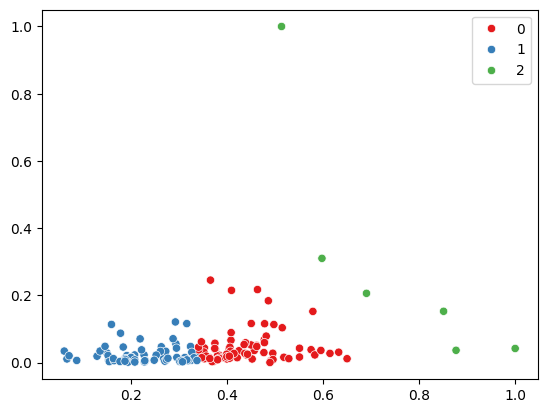

In [101]:
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=x_norm[:,0], y=x_norm[:,1], hue=labels,legend='full',palette="Set1")
plt.show()

In [107]:
tmp.head()

,0,1
0,1.657,15.676957
1,0.904,15.281574
2,1.146,20.138218
3,1.034,12.582363
4,1.034,12.602219


In [108]:
newTmp = pd.concat([tmp,pd.DataFrame(names)], axis=1).dropna()


,0,1,0,0
138,0.670,4.123922,MO,1
139,1.753,6.680501,BN,0
140,0.853,66.196141,ELV,1
141,1.175,30.701012,SHW,0
142,1.320,0.263641,SAN,0


In [ ]:
labelsForTickers = pd.concat([newTmp,pd.DataFrame(labels)], axis=1)


In [110]:
labelsForTickers.head(142)

,0,1,0,0
0,1.657,15.676957,NVDA,0
1,0.904,15.281574,MSFT,1
2,1.146,20.138218,AMZN,0
3,1.034,12.582363,GOOGL,0
4,1.034,12.602219,GOOG,0
...,...,...,...,...
137,0.506,2.431811,BP,1
138,0.670,4.123922,MO,1
139,1.753,6.680501,BN,0
140,0.853,66.196141,ELV,1
